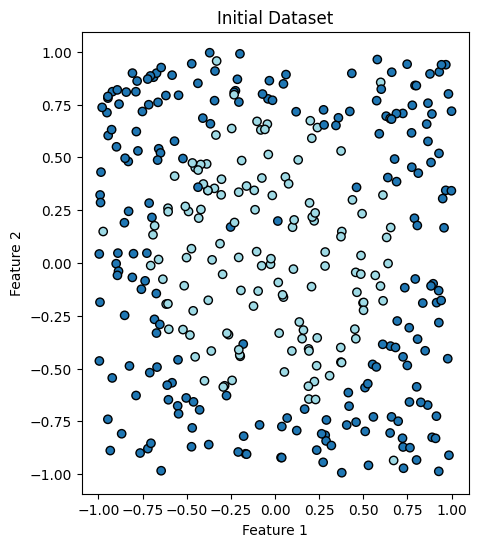

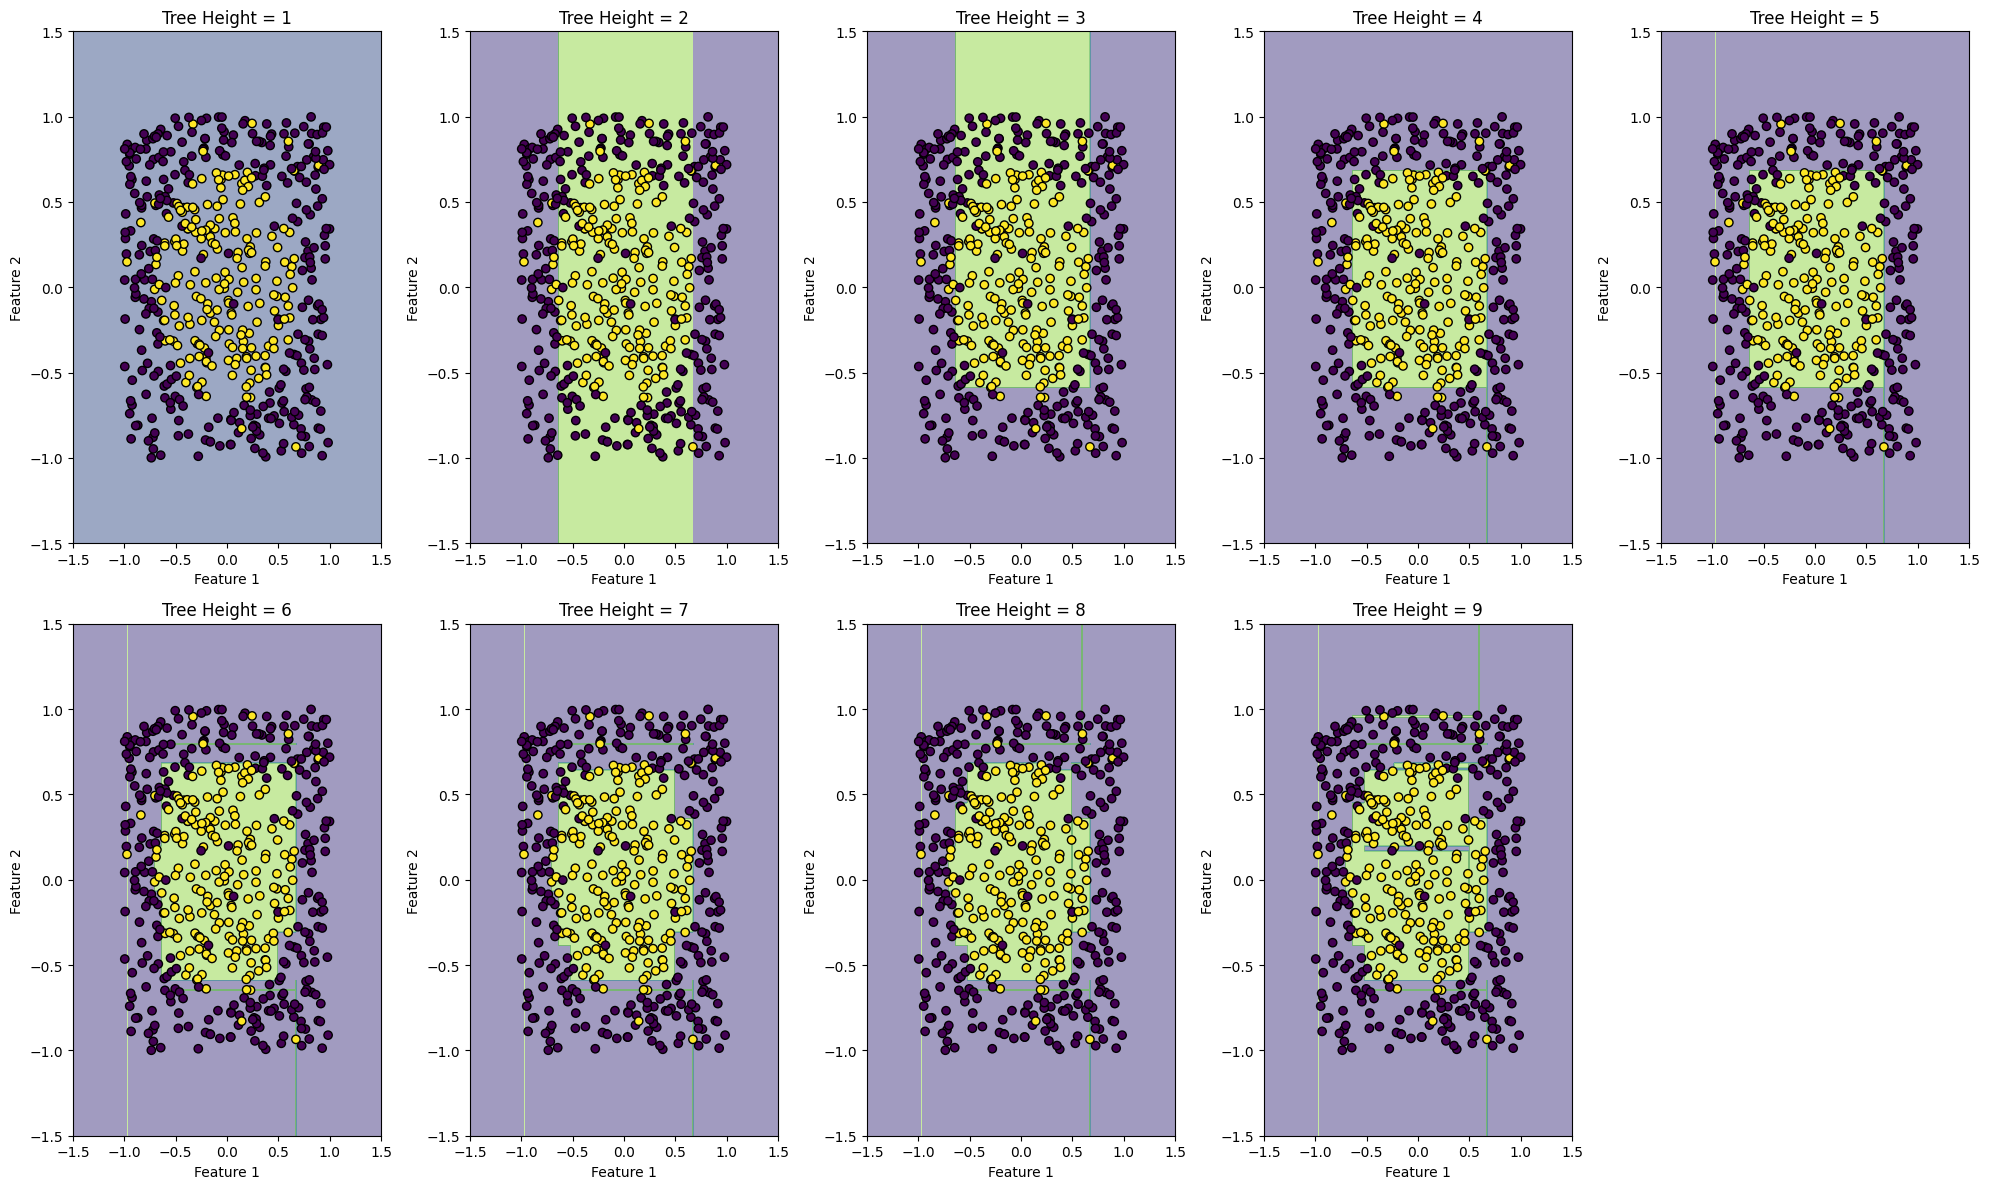

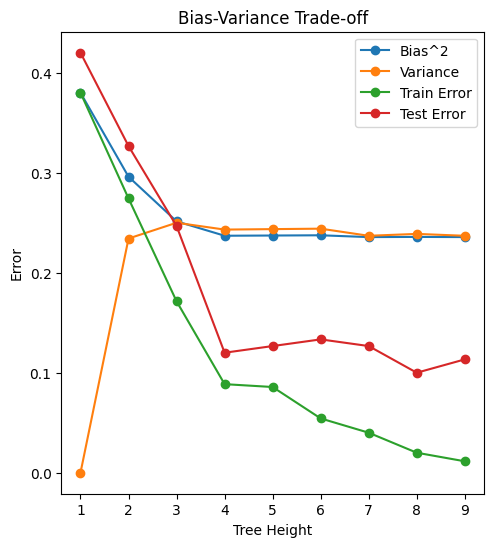

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
np.random.seed(12)
X = np.random.rand(500, 2) * 2 - 1
y = (X[:, 0] ** 2 + X[:, 1] ** 2 < 0.5).astype(int)
y_noise = np.random.binomial(1, 0.05, size=y.shape)  # Adding 10% noise to y
y = np.logical_xor(y, y_noise).astype(int)
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(5, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Initial Dataset')
plt.show()

# Heights of decision trees to evaluate
tree_heights = [1,2,3,4,5,6,7,8,9]
biases = []
variances = []
train_errors = []
test_errors = []
# Plot decision boundaries for each tree height
plt.figure(figsize=(20, 12))
for i, height in enumerate(tree_heights):
    # Fit decision tree
    tree = DecisionTreeClassifier(max_depth=height, random_state =22)
    tree.fit(X_train, y_train)

    # Calculate decision boundaries
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Calculate predictions
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    bias = np.mean((y_train - np.mean(y_train_pred)) ** 2)
    variance = np.mean([np.mean((y_train_pred - np.mean(y_train_pred)) ** 2) for _ in range(100)])
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    biases.append(bias)
    variances.append(variance)
    train_errors.append(train_error)
    test_errors.append(test_error)

    # Plot decision boundary
    plt.subplot(2, 5, i+1)
    plt.contourf(xx, yy, Z, alpha=0.5, levels=2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'Tree Height = {height}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(tree_heights, biases, label='Bias^2', marker='o')
plt.plot(tree_heights, variances, label='Variance', marker='o')
plt.plot(tree_heights, train_errors, label='Train Error', marker='o')
plt.plot(tree_heights, test_errors, label='Test Error', marker='o')
plt.xlabel('Tree Height')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off')
plt.legend()





